In [1]:
import matplotlib.pyplot as plt      #시각화를 위한 설치
import matplotlib.font_manager as fm    # 한글 폰트
import matplotlib                   #시각화를 위한 설치
import os, warnings  
import pandas as pd                #구조 변경 및 결합을 하기 위한 설치
import seaborn as sns              #시각화를 위한 설치
import plotly.express as px        
from sklearn.datasets import make_blobs
import math
import scipy as sp


warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)         #모든 행을 다 보여주라는 명령
pd.set_option('display.max_columns', None)      #모든 열을 다 보여주라는 명령

In [2]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False
## 한글 폰트 적용 ( 안하면 한글 깨짐 )
f_name = fm.FontProperties(fname="C:/Windows/Fonts/malgunbd.ttf").get_name()
plt.rc('font', family=f_name)

In [3]:
cluster=pd.read_csv('VitalSign_Sample.csv',encoding='ANSI')

In [4]:
cluster['fm']=cluster['성별'].map({'M':0,'F':1})

In [5]:
cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   성별      700 non-null    object
 1   키       700 non-null    int64 
 2   몸무게     700 non-null    int64 
 3   수축기혈압   700 non-null    int64 
 4   이완기혈압   700 non-null    int64 
 5   fm      700 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 32.9+ KB


In [6]:
cluster=cluster[(cluster['키']>=130)&(cluster['몸무게']>=5)&(cluster['몸무게']<=140)&(cluster['수축기혈압']>=5)&(cluster['이완기혈압']>=5)] 

In [7]:
cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637 entries, 0 to 699
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   성별      637 non-null    object
 1   키       637 non-null    int64 
 2   몸무게     637 non-null    int64 
 3   수축기혈압   637 non-null    int64 
 4   이완기혈압   637 non-null    int64 
 5   fm      637 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 34.8+ KB


In [8]:
cluster=cluster.astype({'fm':'object'})

In [9]:
cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637 entries, 0 to 699
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   성별      637 non-null    object
 1   키       637 non-null    int64 
 2   몸무게     637 non-null    int64 
 3   수축기혈압   637 non-null    int64 
 4   이완기혈압   637 non-null    int64 
 5   fm      637 non-null    object
dtypes: int64(4), object(2)
memory usage: 34.8+ KB


In [10]:
cluster_f=cluster[['키','몸무게','fm']]

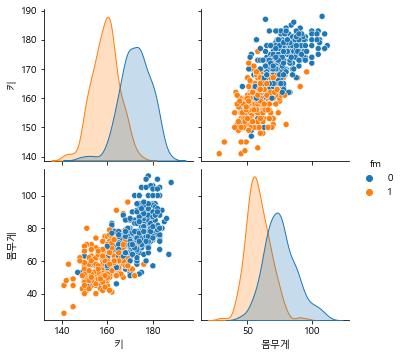

In [11]:
sns.pairplot(cluster_f,hue='fm')

In [12]:
from sklearn.cluster import KMeans

In [13]:
ks=range(1,10)
inertias=[]

for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(cluster_f)
    inertias.append(model.inertia_)

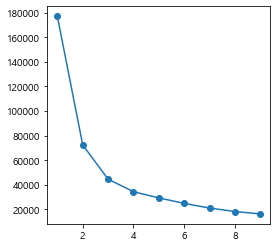

In [14]:
plt.figure(figsize=(4,4))

plt.plot(ks,inertias,'-o')
plt.show()

In [21]:
clust_model=KMeans(n_clusters=2)
clust_model.fit(cluster_f)

centers=clust_model.cluster_centers_
pred=clust_model.predict(cluster_f)

print(pd.DataFrame(centers))
print(pred[:10])

            0          1         2
0  159.959016  57.418033  0.775956
1  173.291513  79.653137  0.136531
[1 1 0 0 0 0 0 0 1 1]


In [22]:
clust_df=cluster_f.copy()
clust_df['clust']=pred
clust_df.head(50)

,키,몸무게,fm,clust
0,175,75,0,1
1,174,68,1,1
2,168,65,1,0
4,160,55,1,0
5,156,55,1,0
6,160,53,1,0
7,156,67,1,0
9,166,67,0,0
10,176,78,0,1
11,177,87,0,1


<AxesSubplot:xlabel='키', ylabel='몸무게'>

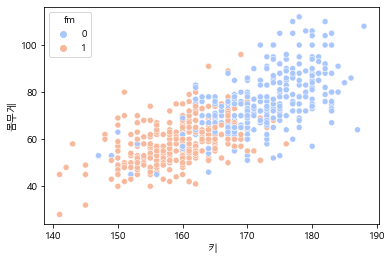

In [17]:
sns.scatterplot(x=clust_df.iloc[:,0],y=clust_df.iloc[:,1],data=clust_df,hue='fm',palette='coolwarm')

<AxesSubplot:xlabel='키', ylabel='몸무게'>

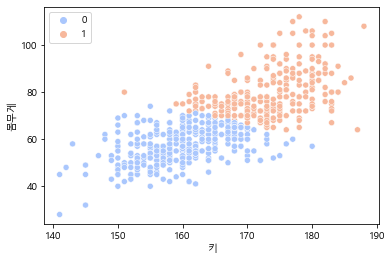

In [23]:
sns.scatterplot(x=clust_df.iloc[:,0],y=clust_df.iloc[:,1],data=cluster_f,hue=clust_model.labels_,palette='coolwarm')

<AxesSubplot:xlabel='키', ylabel='몸무게'>

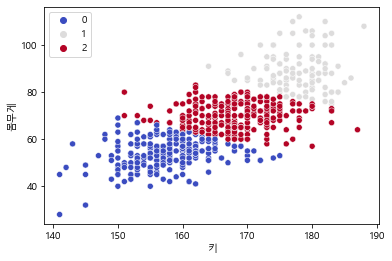

In [19]:
sns.scatterplot(x=clust_df.iloc[:,0],y=clust_df.iloc[:,1],data=cluster_f,hue=clust_model.labels_,palette='coolwarm')

In [20]:
pd.crosstab(clust_df['fm'],clust_df['clust'])

clust,0,1,2
fm,,,
0,25,109,182
1,227,3,91
